In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, PowerTransformer
from mpl_toolkits.mplot3d import Axes3D


In [64]:
df = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\diamonds2.csv")
print("Original Data Shape:", df.shape)
df.head()


Original Data Shape: (53947, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [65]:
df.drop(columns='Unnamed: 0', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df['cut'] = df['cut'].str.strip().str.upper()
df['color'] = df['color'].str.upper().str.replace(r'[^A-Z]', '', regex=True)
df['clarity'] = df['clarity'].str.upper().str.replace(r'[^A-Z0-9]', '', regex=True)

valid_colors = ['D','E','F','G','H','I','J']
df['color'] = df['color'].apply(lambda x: x if x in valid_colors else np.nan)

valid_clarity = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
df['clarity'] = df['clarity'].apply(lambda x: x if x in valid_clarity else np.nan)

df.dropna(subset=['color','clarity'], inplace=True)

print("Data Shape after cleaning:", df.shape)
display(df.info())
print("\nNull Values:\n", df.isnull().sum())
print("\nDuplicates:\n", df.duplicated().sum())

print("\nValue Counts After Cleaning:")
print("\nCut:\n", df['cut'].value_counts())
print("\nColor:\n", df['color'].value_counts())
print("\nClarity:\n", df['clarity'].value_counts())

numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

invalid_values = (df[numeric_cols] <= 0).sum()
print("\nNon-positive Values in Numeric Columns:\n", invalid_values)


Data Shape after cleaning: (53786, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 53786 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53786 non-null  float64
 1   cut      53786 non-null  object 
 2   color    53786 non-null  object 
 3   clarity  53786 non-null  object 
 4   depth    53786 non-null  float64
 5   table    53786 non-null  float64
 6   price    53786 non-null  int64  
 7   x        53786 non-null  float64
 8   y        53786 non-null  float64
 9   z        53786 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 4.5+ MB


None


Null Values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Duplicates:
 0

Value Counts After Cleaning:

Cut:
 cut
IDEAL        21486
PREMIUM      13745
VERY GOOD    12066
GOOD          4891
FAIR          1598
Name: count, dtype: int64

Color:
 color
G    11261
E     9774
F     9515
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

Clarity:
 clarity
SI1     13030
VS2     12228
SI2      9150
VS1      8152
VVS2     5056
VVS1     3646
IF       1784
I1        740
Name: count, dtype: int64

Non-positive Values in Numeric Columns:
 carat    0
depth    0
table    0
price    1
x        7
y        6
dtype: int64


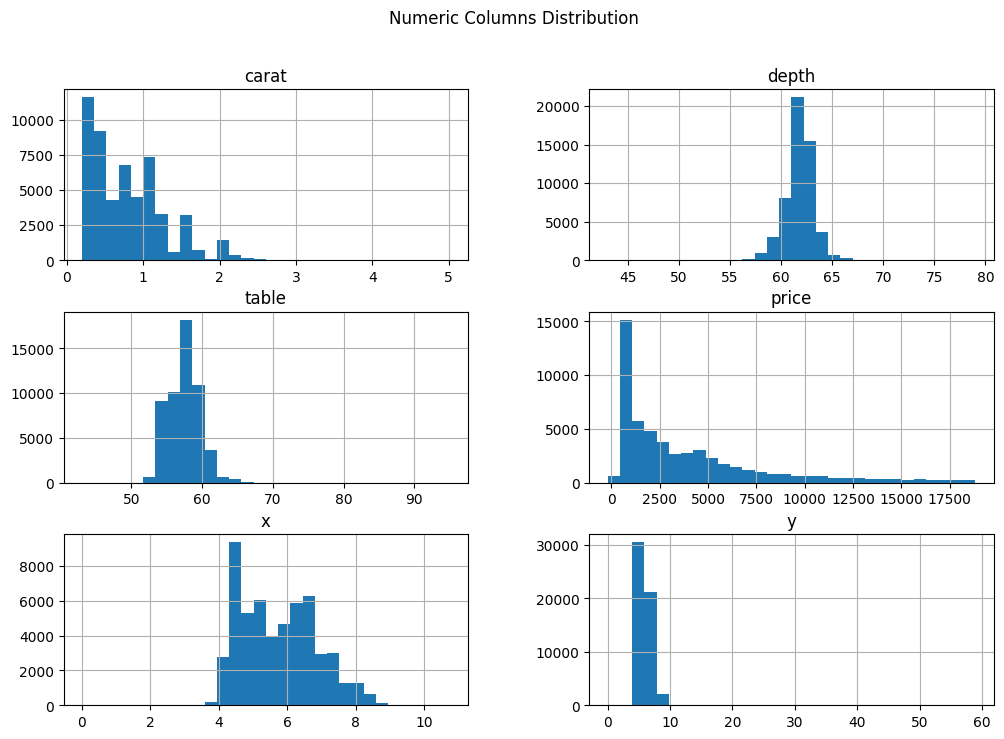


Skewness of Numeric Columns:
carat    1.113495
depth   -0.114275
table    0.792301
price    1.618015
x        0.379556
y        2.445646
dtype: float64


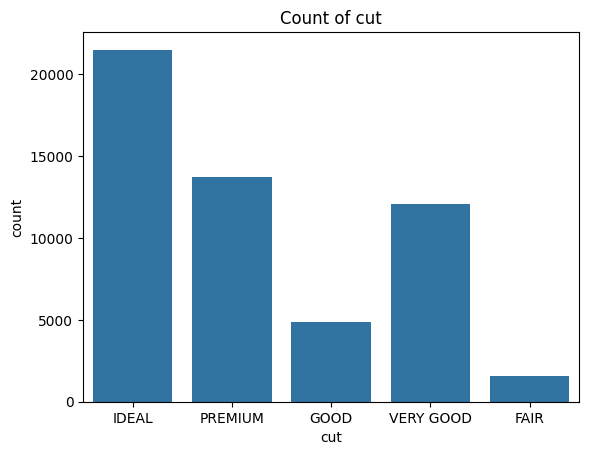

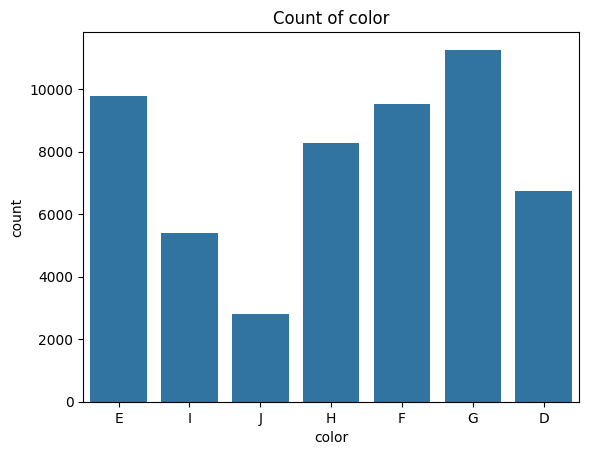

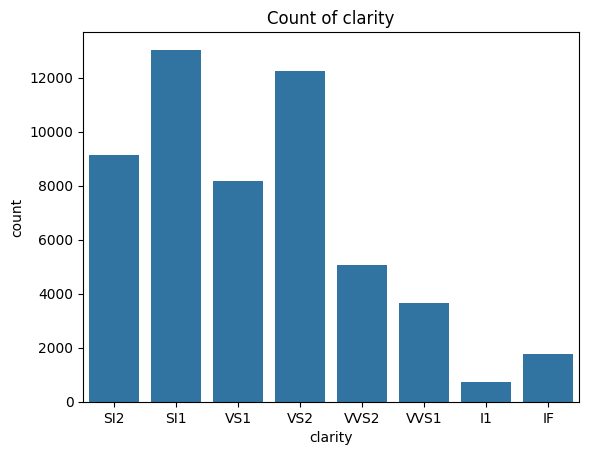

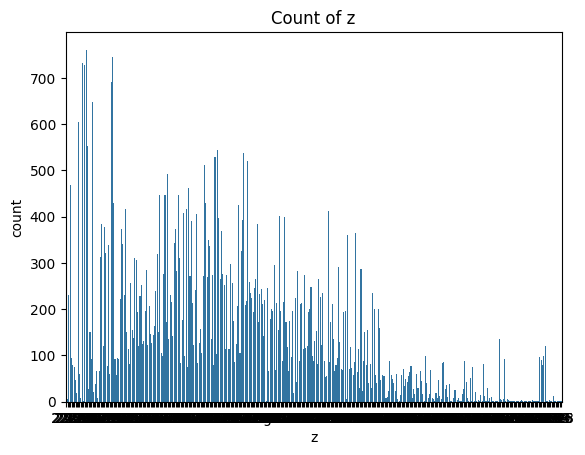

In [66]:
df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Numeric Columns Distribution")
plt.show()

print("\nSkewness of Numeric Columns:")
print(df[numeric_cols].skew())

for col in categorical_cols:
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.show()



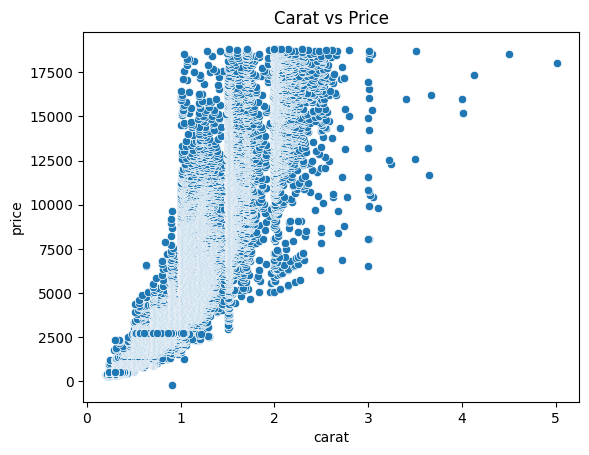

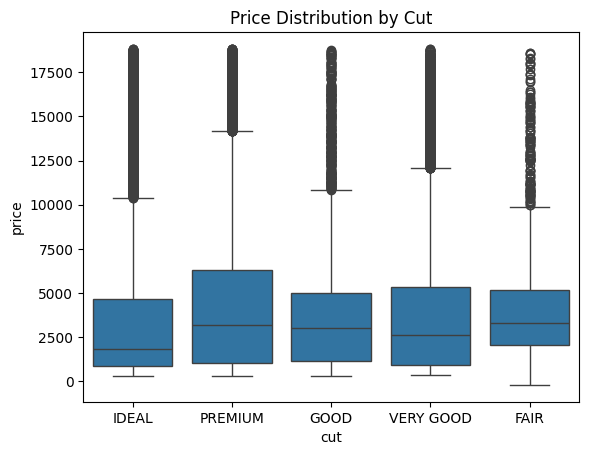

In [67]:
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Carat vs Price')
plt.show()

sns.boxplot(x='cut', y='price', data=df)
plt.title('Price Distribution by Cut')
plt.show()


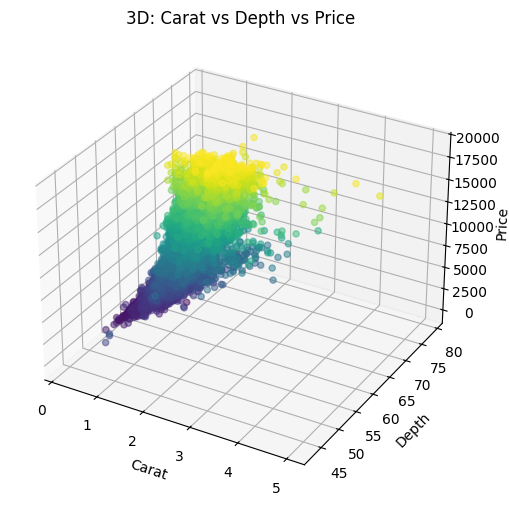

In [68]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['carat'], df['depth'], df['price'], c=df['price'], cmap='viridis', alpha=0.5)
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
plt.title('3D: Carat vs Depth vs Price')
plt.show()



In [69]:
le = LabelEncoder()
df['cut_encoded'] = le.fit_transform(df['cut'])
df_encoded = pd.get_dummies(df, columns=['color', 'clarity'], drop_first=True)
df_encoded.head()



,carat,cut,depth,table,price,x,y,z,cut_encoded,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,IDEAL,61.5,55.0,326,3.95,3.98,2.43,2,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,PREMIUM,59.8,61.0,326,3.89,3.84,2.31,3,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,GOOD,56.9,65.0,327,4.05,4.07,2.31,1,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,PREMIUM,62.4,58.0,334,4.20,4.23,2.63,3,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,GOOD,63.3,58.0,335,4.34,4.35,2.75,1,False,...,False,False,True,False,False,True,False,False,False,False
